# **Part A**

In [1]:
# Import Python Libraries
import numpy as np
#sample 1
x1=np.array([[1,1,1],
             [1,-1,1],
             [1,-1,1],
             [1,-1,1],
             [1,1,1]])
x1=x1.reshape(15,1)
#sample 2
x2=np.array([[1,1,1],
             [1,-1,1],
             [1,1,1],
             [1,-1,1],
             [1,1,1]])
x2=x2.reshape(15,1)

In [2]:
inputSet = np.hstack((x1,x2))
weight = inputSet @ inputSet.T - inputSet.shape[1]*np.eye(inputSet.shape[0])
weight

array([[ 0.,  2.,  2.,  2., -2.,  2.,  2.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 2.,  0.,  2.,  2., -2.,  2.,  2.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 2.,  2.,  0.,  2., -2.,  2.,  2.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 2.,  2.,  2.,  0., -2.,  2.,  2.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [-2., -2., -2., -2.,  0., -2., -2.,  0., -2., -2.,  2., -2., -2.,
        -2., -2.],
       [ 2.,  2.,  2.,  2., -2.,  0.,  2.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 2.,  2.,  2.,  2., -2.,  2.,  0.,  0.,  2.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 2.,  2.,  2.,  2., -2.,  2.,  2.,  0.,  0.,  2., -2.,  2.,  2.,
         2.,  2.],
       [ 2.,  2.,  2.,  2., -2.,  2.,  2.,  0.,  2.,  0., -2.,  2.,  2.,
         2.,  2.],
       [-2., -2., -2., -2.,  2., -2., -2.,  0., -2., -2.,  0., -2., -2.,
       

In [3]:
weight.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Creating Add_mistake(Adding noise) & Add_missing(Missing value) functions

In [4]:
import itertools
list(itertools.combinations(np.arange(0,15), 0))

[()]

In [5]:
import itertools
def add_mistake(vec,n_mistake):
  random_index=list(itertools.combinations(np.arange(0,15), n_mistake))
  all_vec=np.zeros((len(random_index),15))
  for i,index in enumerate(random_index):
    new_vec=vec.copy()
    new_vec[list(index)]=-new_vec[list(index)]
    all_vec[i,:]=new_vec.reshape(1,15)
  return all_vec


In [6]:
add_mistake(x1,0)-x1.reshape(1,15)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
def add_missing_value(vec,n_missing):
  random_index=list(itertools.combinations(np.arange(0,15),n_missing))
  all_vec=np.zeros((len(random_index),15))
  for i,index in enumerate(random_index):
    new_vec=vec.copy()
    new_vec[list(index)]=0
    all_vec[i,:]=new_vec.reshape(1,15)
  return all_vec


In [24]:
add_missing_value(x1,4)[5,:]#-x1.reshape(1,15)

array([ 0.,  0.,  0.,  1., -1.,  1.,  1., -1.,  0.,  1., -1.,  1.,  1.,
        1.,  1.])

# Creat Activation

In [9]:
def activation(In,W):
  new_IN=In @ W
  new_IN[new_IN<0]=-1
  new_IN[new_IN>0]=1
  new_IN[new_IN==0]=In[new_IN==0]
  return new_IN
  

# Creat Update function , in order to recover input

In [10]:
def update(In,W,print_toggle=True):
  In=In.reshape(1,15)
  nepochs=1
  Res=np.vstack((In,activation(In,W)))
  while nepochs!=10 and np.sum((Res[nepochs,:]==Res[nepochs-1,:]).astype('int'))!=15:
    Res=np.vstack((Res,activation(Res[nepochs,:],W)))
    nepochs+=1
  if print_toggle:
    print(f"The Result after {nepochs} is :\n")
  return Res[nepochs,:]


In [11]:
update(x2,weight,print_toggle=True)-x2.reshape(1,15)

The Result after 1 is :



array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
update(add_missing_value(x1,4)[50,:],weight,print_toggle=True)-x1.reshape(1,15)

The Result after 2 is :



array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

# **Part B/C**

## Return Accuracy for given noise/miss rate

In [13]:
def return_acc(source_vec,W,n_mistake,adding='noise'):
  if adding=='noise':
    state=add_mistake(source_vec,n_mistake)
  else:
    state=add_missing_value(source_vec,n_mistake)

  Acc=np.zeros(state.shape[0])
  for i,item in enumerate(state):
    Acc[i]=np.round(np.sum((update(item,W,print_toggle=False)==source_vec.reshape(1,15)).astype('int'))/15*100,2)
  return np.mean(Acc)


In [14]:
return_acc(x1,weight,13,adding='missing')

94.21933333333334

# Testing for noisy elements

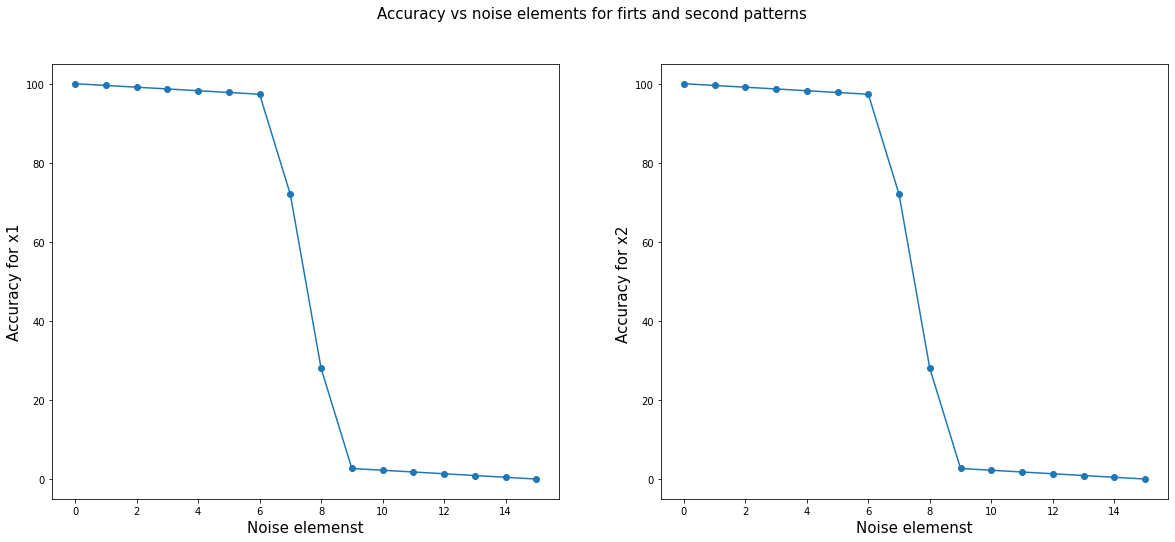

In [15]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(20,8))
final_acc1=[]
final_acc2=[]
for c in range(16):
  final_acc1.append(return_acc(x1,weight,c))
  final_acc2.append(return_acc(x2,weight,c))
ax[0].plot(np.arange(0,16),final_acc1,marker='o')
ax[0].set_xlabel('Noise elemenst',size=15)
ax[0].set_ylabel('Accuracy for x1',size=15)
ax[1].plot(np.arange(0,16),final_acc2,marker='o')
ax[1].set_xlabel('Noise elemenst',size=15)
ax[1].set_ylabel('Accuracy for x2 ',size=15)
plt.suptitle('Accuracy vs noise elements for firts and second patterns',size=15);

# Testing for missing elements

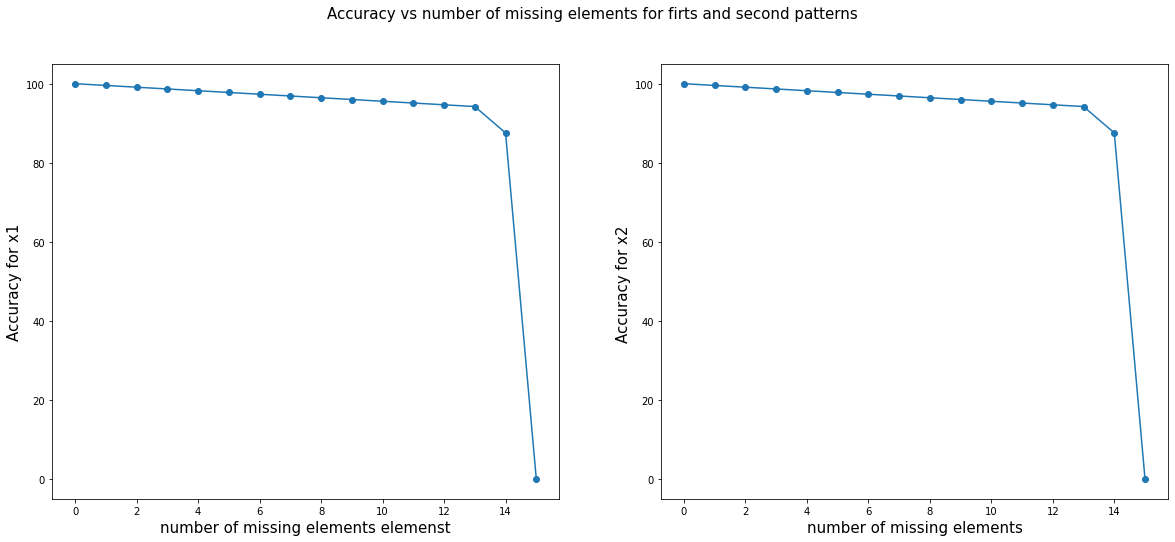

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(20,8))
final_acc1=[]
final_acc2=[]
for c in range(16):
  final_acc1.append(return_acc(x1,weight,c,adding='missing'))
  final_acc2.append(return_acc(x2,weight,c,adding='missing'))
ax[0].plot(np.arange(0,16),final_acc1,marker='o')
ax[0].set_xlabel('number of missing elements elemenst',size=15)
ax[0].set_ylabel('Accuracy for x1',size=15)
ax[1].plot(np.arange(0,16),final_acc2,marker='o')
ax[1].set_xlabel('number of missing elements',size=15)
ax[1].set_ylabel('Accuracy for x2 ',size=15)
plt.suptitle('Accuracy vs number of missing elements for firts and second patterns',size=15);

# **Part D**

## Inserting another patterns

In [17]:
#sample 1
x1=np.array([[1,1,1],
             [1,-1,1],
             [1,-1,1],
             [1,-1,1],
             [1,1,1]])
x1=x1.reshape(15,1)
#sample 3
x3=np.array([[-1,1,1],
             [-1,1,1],
             [-1,1,1],
             [-1,1,1],
             [-1,1,1]])
x3=x3.reshape(15,1)


In [18]:
inputSet_new = np.hstack((x1,x3))
weight_new = inputSet_new @ inputSet_new.T - inputSet_new.shape[1]*np.eye(inputSet_new.shape[0])
weight_new

array([[ 0.,  0.,  0.,  2., -2.,  0.,  2., -2.,  0.,  2., -2.,  0.,  2.,
         0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         2.,  2.],
       [ 0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         2.,  2.],
       [ 2.,  0.,  0.,  0., -2.,  0.,  2., -2.,  0.,  2., -2.,  0.,  2.,
         0.,  0.],
       [-2.,  0.,  0., -2.,  0.,  0., -2.,  2.,  0., -2.,  2.,  0., -2.,
         0.,  0.],
       [ 0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         2.,  2.],
       [ 2.,  0.,  0.,  2., -2.,  0.,  0., -2.,  0.,  2., -2.,  0.,  2.,
         0.,  0.],
       [-2.,  0.,  0., -2.,  2.,  0., -2.,  0.,  0., -2.,  2.,  0., -2.,
         0.,  0.],
       [ 0.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         2.,  2.],
       [ 2.,  0.,  0.,  2., -2.,  0.,  2., -2.,  0.,  0., -2.,  0.,  2.,
         0.,  0.],
       [-2.,  0.,  0., -2.,  2.,  0., -2.,  2.,  0., -2.,  0.,  0., -2.,
       

In [19]:
weight_new.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Testing for noisy elements

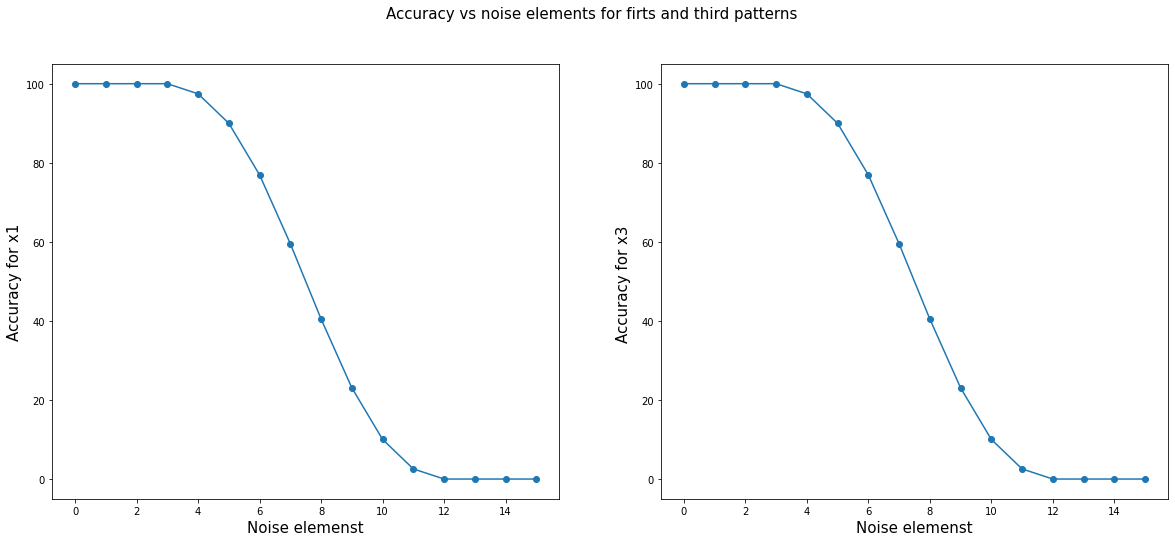

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(20,8))
final_acc1=[]
final_acc2=[]
for c in range(16):
  final_acc1.append(return_acc(x1,weight_new,c))
  final_acc2.append(return_acc(x3,weight_new,c))
ax[0].plot(np.arange(0,16),final_acc1,marker='o')
ax[0].set_xlabel('Noise elemenst',size=15)
ax[0].set_ylabel('Accuracy for x1',size=15)
ax[1].plot(np.arange(0,16),final_acc2,marker='o')
ax[1].set_xlabel('Noise elemenst',size=15)
ax[1].set_ylabel('Accuracy for x3 ',size=15)
plt.suptitle('Accuracy vs noise elements for firts and third patterns',size=15);

# Testing for missing elements

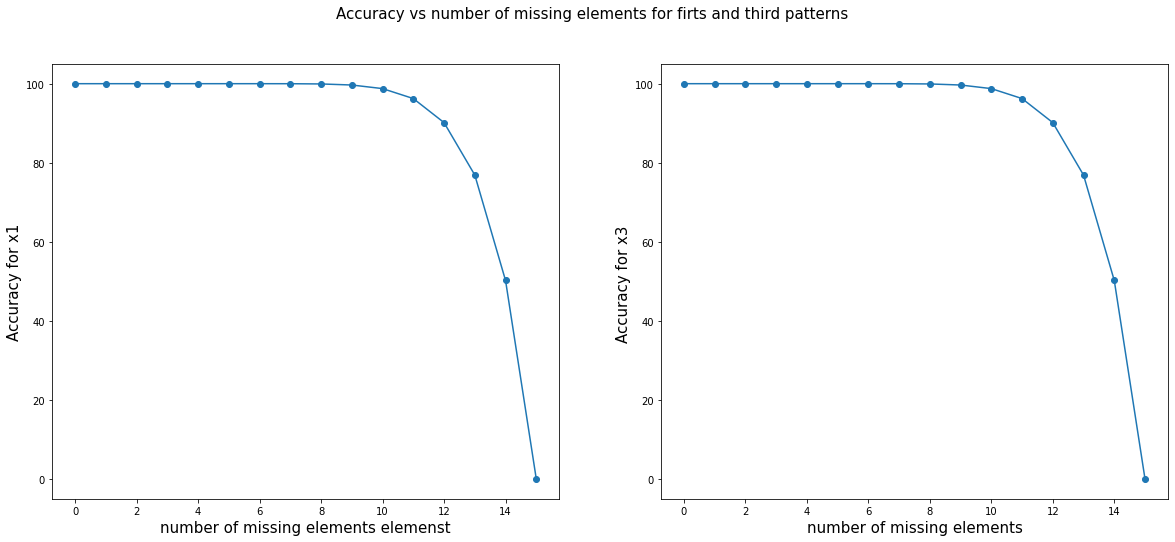

In [21]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(20,8))
final_acc1=[]
final_acc2=[]
for c in range(16):
  final_acc1.append(return_acc(x1,weight_new,c,adding='missing'))
  final_acc2.append(return_acc(x3,weight_new,c,adding='missing'))
ax[0].plot(np.arange(0,16),final_acc1,marker='o')
ax[0].set_xlabel('number of missing elements elemenst',size=15)
ax[0].set_ylabel('Accuracy for x1',size=15)
ax[1].plot(np.arange(0,16),final_acc2,marker='o')
ax[1].set_xlabel('number of missing elements',size=15)
ax[1].set_ylabel('Accuracy for x3 ',size=15)
plt.suptitle('Accuracy vs number of missing elements for firts and third patterns',size=15);